In [15]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### read in csv into dataframe

In [16]:
# Read the csv file into a pandas DataFrame
smoking = pd.read_csv('data/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [17]:
# Use Pandas get_dummies to convert categorical data
smoking = pd.get_dummies(smoking)
smoking.head()

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [18]:
# Drop extra columns
smoking = smoking.drop(columns=['Sex_Female','Smoker_Non'])
smoking.head()

,Id,Age,FEV,Height,Sex_Male,Smoker_Current
0,301,9,1.708,57.0,0,0
1,451,8,1.724,67.5,0,0
2,501,7,1.720,54.5,0,0
3,642,9,1.558,53.0,1,0
4,901,9,1.895,57.0,1,0


In [19]:
# Assign X (data) and y (target)
X = smoking[['Age', 'Height', 'Sex_Male', 'Smoker_Current']]
y = smoking["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)

(654, 4) (654, 1)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

### residual plot

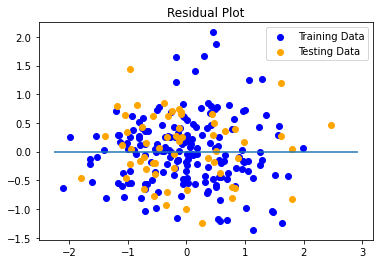

In [23]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

### linear model quantify 

In [24]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991293, R2: 0.6804912531419807


### LASSO model

In [25]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230431959230875, R2: 0.6805030840005228


### Ridge model

In [26]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.32304954769269045, R2: 0.6804968019589108


### ElasticNet model

In [27]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.32255022114076526, R2: 0.6809906470404048
